In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import pymysql
import xlsxwriter

In [2]:
conn=pymysql.connect(host='localhost', port=3306,user='root', passwd='', db='sqlteste')
cur=conn.cursor()
cur1=conn.cursor()
cur.execute("SELECT p.Id, Nome, Valor, Mensagem FROM pessoa p INNER JOIN comissao c ON p.Id=c.Id INNER JOIN mensagem m ON c.idMsg=m.idMsg WHERE Valor>=100 ORDER BY Nome")
results=list(cur.fetchall())# esta parte es muy importante
#results1=list(cur1.fetchall())
frame=pd.DataFrame(results, columns=['Id','Nome','Valor','Descricao'])
frame

,Id,Nome,Valor,Descricao
0,42,Antônio Dias,170,Fretes Empresas
1,649,Carla Santiago,2300,Fretes Individuais
2,37,Isa Rodrigues,120,Deslocações
3,14,Isabel Augusto,370,Ofertas
4,14,Isabel Augusto,105,Comissão de Vendas
5,14,Isabel Augusto,400,Combustíveis
6,25,Rute Bernardo,250,Comissão de Vendas
7,132,Zulmira Santos,370,Fretes Empresas
8,132,Zulmira Santos,260,Refeições


In [3]:
df=frame.set_index('Id')
df.sort_values(by=['Id','Valor'],ascending=True)

,Nome,Valor,Descricao
Id,,,
14,Isabel Augusto,105,Comissão de Vendas
14,Isabel Augusto,370,Ofertas
14,Isabel Augusto,400,Combustíveis
25,Rute Bernardo,250,Comissão de Vendas
37,Isa Rodrigues,120,Deslocações
42,Antônio Dias,170,Fretes Empresas
132,Zulmira Santos,260,Refeições
132,Zulmira Santos,370,Fretes Empresas
649,Carla Santiago,2300,Fretes Individuais


In [4]:
df['Valor']=pd.to_numeric(df['Valor'])

In [5]:
grouped=df.groupby(df['Nome']).sum()

In [6]:
conn=pymysql.connect(host='localhost', port=3306,user='root', passwd='', db='sqlteste')
cur=conn.cursor()
cur1=conn.cursor()
cur.execute("SELECT * FROM (SELECT Id, Nome, sum(Valor) as total_recebido,count(Nome) AS veces_recebido, avg(Valor) as valor_promedio FROM (SELECT p.Id, Nome, Valor, Mensagem FROM pessoa p INNER JOIN comissao c ON p.Id=c.Id INNER JOIN mensagem m ON c.idMsg=m.idMsg ORDER BY Nome)sub   WHERE Valor>1 OR Nome LIKE 'A%'  GROUP BY Nome)sub WHERE veces_recebido>1")
results1=list(cur.fetchall())# esta parte es muy importante
results1
#results1=list(cur1.fetchall())
framed=pd.DataFrame(results1, columns=['Id','Nome','Total_recebido','veces_recebido','media_de_recebimento'])
framed

,Id,Nome,Total_recebido,veces_recebido,media_de_recebimento
0,42,Antônio Dias,190,2,95.0000
1,37,Isa Rodrigues,218,4,54.5000
2,14,Isabel Augusto,875,3,291.6667
3,132,Zulmira Santos,630,2,315.0000


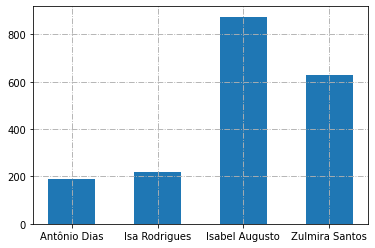

In [7]:
plt.bar(framed['Nome'],framed['Total_recebido'], width=.55)
plt.grid(True, linestyle='-.', linewidth=0.9)

In [8]:
writer=pd.ExcelWriter('F:\PROYECTOS SQL, PYTHON, BASES DE DATOS/alguma_coisa.xlsx',engine='xlsxwriter')

In [9]:
grouped.to_excel(writer, sheet_name='Hoja1')
framed.to_excel(writer, sheet_name='Hoja2')
writer.save()